In [6]:
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd
# binding_db_sdf_path = "/p/lustre2/jones289/data/BindingDB_All_terse_2D.sdf"
binding_db_sdf_path = "/p/lustre2/jones289/BindingDB_All_3D.sdf"
binding_db_pairwise_dist_path = "/usr/WS1/jones289/hd-cuda-master/datasets/bindingDB/ChEMBL_TanimotoU100.tsv"

In [8]:
def load_binding_pairwise_dists(binding_db_pairwise_dist_path):
    df = pd.read_csv(binding_db_pairwise_dist_path, sep='\t')
    return df

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
bind_db_pwise_dist_df = load_binding_pairwise_dists(binding_db_pairwise_dist_path)
bind_db_pwise_dist_df

,ChEMBL1,SMILES1,ChEMBL2,SMILES2,Tanimoto
0,CHEMBL597393,COc1ccc-2c(NC(=O)Cc3cnc(Nc4ccc(OC)c(O)c4)nc-23)c1,CHEMBL253921,CN(C)C(=O)c1cccc(N=C2NS(=O)(=O)N=C2N[C@@H](c2c...,0.2841
1,CHEMBL597393,COc1ccc-2c(NC(=O)Cc3cnc(Nc4ccc(OC)c(O)c4)nc-23)c1,CHEMBL2315074,Nc1ncc(-c2cccnc2)c2scc(-c3cccc(NC(=O)NC4CCCCC4...,0.3117
2,CHEMBL597393,COc1ccc-2c(NC(=O)Cc3cnc(Nc4ccc(OC)c(O)c4)nc-23)c1,CHEMBL4075798,Cc1ccc(F)c(c1)-c1cc(Nc2ccnc3cn(CC(N)=O)nc23)c(...,0.3082
3,CHEMBL597393,COc1ccc-2c(NC(=O)Cc3cnc(Nc4ccc(OC)c(O)c4)nc-23)c1,CHEMBL3576921,[H][C@@]1(C[C@H](O)[C@H](O)[C@@H](C)O1)O[C@H]1...,0.1926
4,CHEMBL597393,COc1ccc-2c(NC(=O)Cc3cnc(Nc4ccc(OC)c(O)c4)nc-23)c1,CHEMBL408577,CCOC(=O)CN(CCCOc1ccc2ccccc2c1)c1ccc(OC)cc1,0.2332
...,...,...,...,...,...
4945,CHEMBL207940,NC(=O)c1cc(ccc1N)-c1ccccc1,CHEMBL3342365,CNc1nc(NCC(C)(C)C)cc(n1)-c1ccccn1,0.1800
4946,CHEMBL207940,NC(=O)c1cc(ccc1N)-c1ccccc1,CHEMBL374255,Cc1[nH]c2ccccc2c1Cc1nc2c3CCCCc3ccc2c(C(O)=O)c1O,0.1855
4947,CHEMBL345649,OC(=O)C[C@@H](NC(=O)[C@@H]1CCN1S(=O)(=O)c1cc(C...,CHEMBL3342365,CNc1nc(NCC(C)(C)C)cc(n1)-c1ccccn1,0.1790
4948,CHEMBL345649,OC(=O)C[C@@H](NC(=O)[C@@H]1CCN1S(=O)(=O)c1cc(C...,CHEMBL374255,Cc1[nH]c2ccccc2c1Cc1nc2c3CCCCc3ccc2c(C(O)=O)c1O,0.2160


In [21]:
def plot_pwise_dists(df):
    
    f, ax = plt.subplots(1,1, figsize=(10,7))
    sns.distplot(df['Tanimoto'], ax=ax)
    ax.set_title("bindingDB Ligand Tanimoto dist")
    plt.savefig("bindingdb_ligand_tanimoto_dist.png", dpi=600)

/usr/workspace/wsa/jones289/miniconda3/envs/atomsci/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


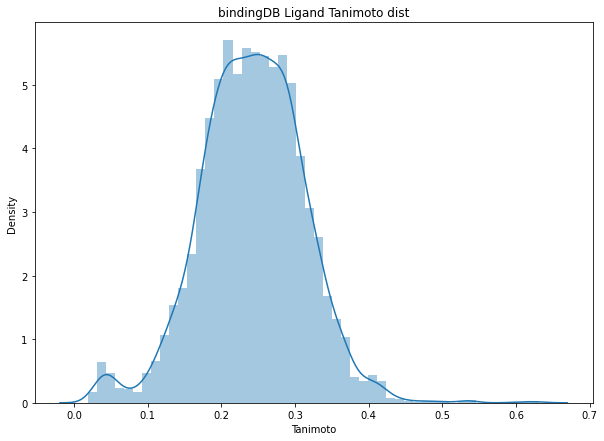

In [22]:
plot_pwise_dists(bind_db_pwise_dist_df)

In [23]:
def load_bindingdb_sdf(binding_db_sdf_path):
    suppl = Chem.SDMolSupplier(binding_db_sdf_path)
    df = PandasTools.LoadSDF(binding_db_sdf_path,smilesName='SMILES',molColName='Molecule',
           includeFingerprints=True)
    return df

In [24]:
binding_sdf_db = load_bindingdb_sdf("/p/lustre2/jones289/BindingDB_All_3D.sdf")

RDKit ERROR: [16:31:49] non-ring atom 36 marked aromatic
RDKit ERROR: [16:31:49] ERROR: Could not sanitize molecule ending on line 3891534
RDKit ERROR: [16:31:49] ERROR: non-ring atom 36 marked aromatic
RDKit ERROR: [16:31:49] non-ring atom 36 marked aromatic
RDKit ERROR: [16:31:49] ERROR: Could not sanitize molecule ending on line 3920853
RDKit ERROR: [16:31:49] ERROR: non-ring atom 36 marked aromatic
RDKit ERROR: [16:31:52] Explicit valence for atom # 15 N, 4, is greater than permitted
RDKit ERROR: [16:31:52] ERROR: Could not sanitize molecule ending on line 4356075
RDKit ERROR: [16:31:52] ERROR: Explicit valence for atom # 15 N, 4, is greater than permitted
RDKit ERROR: [16:32:29] Explicit valence for atom # 27 N, 4, is greater than permitted
RDKit ERROR: [16:32:29] ERROR: Could not sanitize molecule ending on line 9733927
RDKit ERROR: [16:32:29] ERROR: Explicit valence for atom # 27 N, 4, is greater than permitted
RDKit ERROR: [16:32:29] Explicit valence for atom # 27 N, 4, is grea

RDKit ERROR: [16:35:49] ERROR: Explicit valence for atom # 60 B, 4, is greater than permitted
RDKit ERROR: [16:35:51] Explicit valence for atom # 33 O, 3, is greater than permitted
RDKit ERROR: [16:35:51] ERROR: Could not sanitize molecule ending on line 39213143
RDKit ERROR: [16:35:51] ERROR: Explicit valence for atom # 33 O, 3, is greater than permitted
RDKit ERROR: [16:35:55] Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:35:55] ERROR: Could not sanitize molecule ending on line 39743649
RDKit ERROR: [16:35:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:35:55] Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:35:55] ERROR: Could not sanitize molecule ending on line 39744288
RDKit ERROR: [16:35:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:35:55] Can't kekulize mol.  Unkekulized atoms: 203 20

RDKit ERROR: [16:36:01] ERROR: Explicit valence for atom # 3 O, 4, is greater than permitted
RDKit ERROR: [16:36:01] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:01] ERROR: Could not sanitize molecule ending on line 40614627
RDKit ERROR: [16:36:01] ERROR: Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:01] Explicit valence for atom # 3 O, 4, is greater than permitted
RDKit ERROR: [16:36:01] ERROR: Could not sanitize molecule ending on line 40615957
RDKit ERROR: [16:36:01] ERROR: Explicit valence for atom # 3 O, 4, is greater than permitted
RDKit ERROR: [16:36:03] Can't kekulize mol.  Unkekulized atoms: 212 213 214 215 216
RDKit ERROR: 
RDKit ERROR: [16:36:03] ERROR: Could not sanitize molecule ending on line 40797965
RDKit ERROR: [16:36:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 212 213 214 215 216
RDKit ERROR: 
RDKit ERROR: [16:36:03] Can't kekulize mol.  Unkekulized atoms: 212 213 214 215 216
RDKit ERROR: 

RDKit ERROR: [16:36:22] ERROR: Explicit valence for atom # 19 O, 3, is greater than permitted
RDKit ERROR: [16:36:22] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:36:22] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:36:24] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:24] ERROR: Could not sanitize molecule ending on line 43568150
RDKit ERROR: [16:36:24] ERROR: Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:24] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:24] ERROR: Could not sanitize molecule ending on line 43568926
RDKit ERROR: [16:36:24] ERROR: Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:24] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:24] ERROR: Could not sanitize molecule ending on line 43569705
RDKit ERROR: [16:36:24] ERROR: Explicit valence for atom # 4 O, 4

RDKit ERROR: [16:36:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:36:36] Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:36:36] ERROR: Could not sanitize molecule ending on line 45171474
RDKit ERROR: [16:36:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:36:36] Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:36:36] ERROR: Could not sanitize molecule ending on line 45172113
RDKit ERROR: [16:36:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 203 206 207 209 210
RDKit ERROR: 
RDKit ERROR: [16:36:37] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [16:36:37] ERROR: Could not sanitize molecule ending on line 45257067
RDKit ERROR: [16:36:37] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [16:36:37] Can't kekulize mo

RDKit ERROR: [16:36:46] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5
RDKit ERROR: 
RDKit ERROR: [16:36:46] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:46] ERROR: Could not sanitize molecule ending on line 46354386
RDKit ERROR: [16:36:46] ERROR: Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:46] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:46] ERROR: Could not sanitize molecule ending on line 46355164
RDKit ERROR: [16:36:46] ERROR: Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:46] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:46] ERROR: Could not sanitize molecule ending on line 46367153
RDKit ERROR: [16:36:46] ERROR: Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:46] Explicit valence for atom # 4 O, 4, is greater than permitted
RDKit ERROR: [16:36:46] ERROR: Co

RDKit ERROR: [16:38:02] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:38:02] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:02] ERROR: Could not sanitize molecule ending on line 56708606
RDKit ERROR: [16:38:02] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:02] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:02] ERROR: Could not sanitize molecule ending on line 56708812
RDKit ERROR: [16:38:02] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:02] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:02] ERROR: Could not sanitize molecule ending on line 56709026
RDKit ERROR: [16:38:02] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:02] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [16:38:02] ERROR: Cou

RDKit ERROR: [16:38:14] ERROR: Explicit valence for atom # 43 N, 4, is greater than permitted
RDKit ERROR: [16:38:18] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:18] ERROR: Could not sanitize molecule ending on line 58864163
RDKit ERROR: [16:38:18] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:18] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:18] ERROR: Could not sanitize molecule ending on line 58864341
RDKit ERROR: [16:38:18] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:38:31] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:38:31] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:38:32] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:38:32] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:38:35] ERROR: Problems encountered parsing data fields
RDKit ERROR: [

RDKit ERROR: [16:39:01] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:39:07] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:39:07] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:39:07] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:39:07] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:39:07] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:39:07] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:39:07] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:39:07] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:39:07] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:39:07] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:39:07] ERROR: Problems encountered parsing data fields
RDKit ERROR: [16:39:07] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [16:39

RDKit ERROR: [16:39:18] ERROR: Could not sanitize molecule ending on line 66631030
RDKit ERROR: [16:39:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [16:39:18] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [16:39:18] ERROR: Could not sanitize molecule ending on line 66631237
RDKit ERROR: [16:39:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [16:39:18] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [16:39:18] ERROR: Could not sanitize molecule ending on line 66631459
RDKit ERROR: [16:39:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [16:39:18] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [16:39:18] ERROR: Could not sanitize molecule ending on line 66631690
RDKit ERROR: [16:

RDKit ERROR: [16:39:18] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [16:39:30] Explicit valence for atom # 74 N, 4, is greater than permitted
RDKit ERROR: [16:39:30] ERROR: Could not sanitize molecule ending on line 68042669
RDKit ERROR: [16:39:30] ERROR: Explicit valence for atom # 74 N, 4, is greater than permitted
RDKit ERROR: [16:39:30] Explicit valence for atom # 72 N, 4, is greater than permitted
RDKit ERROR: [16:39:30] ERROR: Could not sanitize molecule ending on line 68053404
RDKit ERROR: [16:39:30] ERROR: Explicit valence for atom # 72 N, 4, is greater than permitted
RDKit ERROR: [16:39:38] Explicit valence for atom # 20 N, 4, is greater than permitted
RDKit ERROR: [16:39:38] ERROR: Could not sanitize molecule ending on line 69001993
RDKit ERROR: [16:39:38] ERROR: Explicit valence for atom # 20 N, 4, is greater than permitted
RDKit ERROR: [16:39:38] Explicit valence for atom # 16 N, 4, is greater than permitted
RDKit ERR